<a href="https://colab.research.google.com/github/pdpranavkumar/Data-Science-Portfolio/blob/main/Boston_Housing_Dataset_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


**Linear Regreesion is one of the fundamental machine learning techniques in data science.
It makes predictions by discovering the best fit line that reaches the most points. 
Once it learns, it can start to predict prices, weight, and more. 
In this project using Linear Regression to Model and Predict Housing Prices with the Boston Housing Dataset, I will run through the steps to create a linear regression model using appropriate features, data, and analyze my results.**

#Load Libraries and Datasets

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [48]:
#load Dataset from sklearn
from sklearn.datasets import load_boston

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
path="/content/drive/MyDrive/Almabetter/housing.csv"
housing_df = pd.read_csv(path)

In [51]:
# load Data
boston = load_boston()

# data is in dictionary, Populate dataframe with data key
df = pd.DataFrame(boston.data)

# columns are indexed, Fill in Column names with feature_names key
df.columns = boston.feature_names

# we need Median Value! boston.data contains only the features, no price value.
df['MEDV'] = pd.DataFrame(boston.target)
df.shape 

# our dataset contains 506 data points and 14 columns
# here is a glimpse of our data first 3 rows
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


#Below are our definitions of each feature name in housing dataset

*  CRIM - per capita crime rate by town
*  ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*  INDUS - proportion of non-retail business acres per town.
*  CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*  PTRATIO - pupil-teacher ratio by town
*  NOX - nitric oxides concentration (parts per 10 million)
*  RM - average number of rooms per dwelling
*  AGE - proportion of owner-occupied units built prior to 1940
*    B - 1000 (Bk - 0.63) ^ 2 where Bk is the proportion of blacks by town
*  DIS - weighted distances to five Boston employment centres
*  RAD - index of accessibility to radial highways
*  TAX - full-value property-tax rate per $10,000

*  LLSTAT - % lower status of the population
*  MEDV - Median value of owner-occupied homes in $1000's
*  MEDV is the dependent variable.








# Prepare Dataset For Modeling 




***Missing Data***
#Let's check if we have any missing data

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


It doesn’t show null values but when we look at df.head() from above, we can see that there are values of 0 which can also be missing values.
For good measure, we’ll turn the 0 values into np.nan where we can see what is missing.

In [54]:
#first we replace the 0 values with the np.nan values
df.replace(0, np.nan, inplace = True)

In [56]:
#check the percentage of each column data is missing
df.isnull().sum()/len(df)

CRIM       0.000000
ZN         0.735178
INDUS      0.000000
CHAS       0.930830
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
MEDV       0.000000
dtype: float64

This shows that ZN has 73% and CHAS has 93% of missing data.We can leave it because they don not give us enough information for our regression model to interpret.


In [57]:
#drop ZN and CHAS with too many misiing columns
df = df.drop('ZN', axis = 1) 
df = df.drop('CHAS', axis = 1) 

In [58]:
 df.head(5)

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Check Multicollinearity
It’s helpful to see which features increase/decrease together. Features that correlate together may make interpretability of their effectiveness difficult. An analogy that someone made on stackoverflow was that if you want to measure the strength of two people who are pushing the same boulder up a hill, it’s hard to tell who is pushing at what rate. 



In [59]:
import seaborn as sns


In [60]:
#steps to remove reduntant values
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

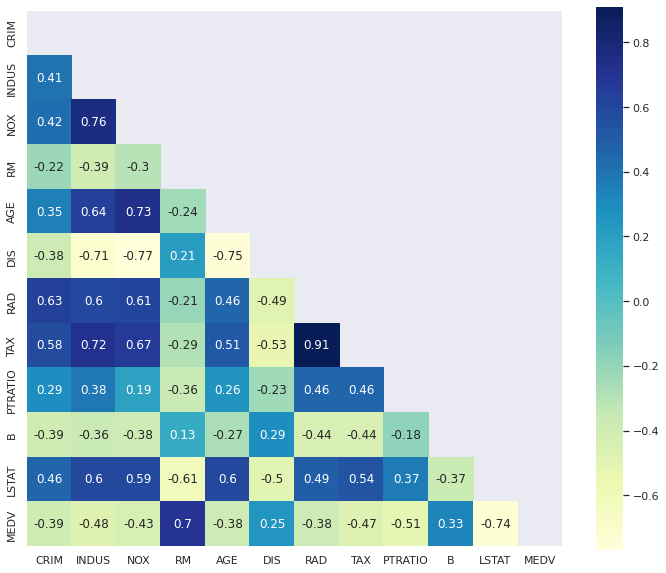

In [62]:
sns.set(rc={'figure.figsize': (12,10)})
sns.heatmap(df.corr().round(2), square=True, cmap='YlGnBu', annot=True, mask=mask);

From the above heatmap analysis
If,I set a cut off for high correlation to be +-75,we can see that:
*   TAX and RAD have high correlation of 0.91
*   DIS and NOX have high correlation of -0.77
*   NOX and INDUS have high correlation of 0.76
*   MEDV has high correlation with RM and LSTAT 0.7 and -0.74



In [63]:
#drop the correlated values
columns = ['TAX', 'RAD', 'NOX', 'INDUS','DIS']
df = df.drop(columns=columns) 